/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


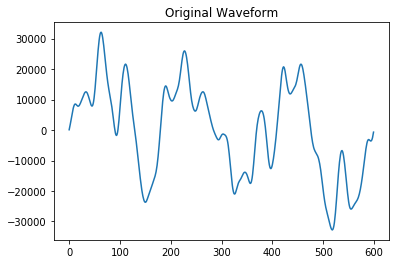

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

spf = wave.open('AKWF_piano_0001.wav','r')
#Extract Raw Audio from Wav File
#If Stereo
if spf.getnchannels() == 2:
    print('Just mono files')
    sys.exit(0)
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')

plt.figure(1)
plt.title('Original Waveform')
plt.plot(signal)
plt.show()

In [2]:
def upsample(original_signal, rate):
    result = []
    for _ in range(rate):
        for s in signal[::rate]:
            result.append(s)
    return result

In [3]:
def sum_signals(signals):
    result = []
    for set in zip(*signals):
        result.append(sum(set))
    return result

In [4]:
def display_for_c(signal):
    result = []
    result.append('int16_t wave_table[] = {')
    for x in signal[:-1]:
        result.append(str(x))
        result.append(', ')
    result.append(str(signal[-1]))
    result.append('};')
    print(''.join(result))

In [15]:
def scale_amplitude(signal, scalar):
    return [int(x * scalar) for x in signal]

int16_t wave_table[] = {8, 86, 173, 266, 361, 457, 550, 635, 712, 772, 816, 844, 852, 848, 832, 812, 796, 782, 781, 790, 809, 838, 874, 916, 959, 1005, 1049, 1092, 1134, 1170, 1204, 1230, 1247, 1253, 1246, 1227, 1196, 1154, 1103, 1046, 988, 927, 871, 825, 795, 784, 800, 849, 929, 1044, 1192, 1367, 1566, 1779, 1998, 2217, 2428, 2624, 2800, 2951, 3069, 3152, 3199, 3206, 3178, 3116, 3023, 2906, 2768, 2617, 2458, 2294, 2131, 1972, 1823, 1686, 1560, 1446, 1341, 1246, 1155, 1064, 970, 868, 758, 637, 506, 371, 234, 105, -7, -97, -156, -179, -159, -96, 8, 149, 319, 514, 721, 933, 1143, 1343, 1527, 1692, 1834, 1952, 2045, 2110, 2148, 2160, 2144, 2103, 2037, 1946, 1836, 1707, 1564, 1410, 1250, 1090, 932, 781, 637, 501, 375, 252, 131, 8, -120, -253, -392, -536, -684, -836, -989, -1144, -1297, -1447, -1593, -1728, -1856, -1972, -2074, -2163, -2236, -2296, -2338, -2363, -2370, -2361, -2337, -2300, -2254, -2207, -2157, -2109, -2062, -2016, -1970, -1922, -1872, -1821, -1769, -1718, -1669, -1619, -156

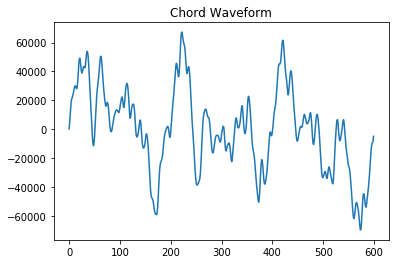

In [17]:
s1 = signal
s2 = upsample(signal, 2)
s3 = upsample(signal, 3)

chord = sum_signals([s1, s2, s3])

s4 = scale_amplitude(s1, 0.1)
display_for_c(s4)

plt.figure(2)
plt.title('Chord Waveform')
plt.plot(chord)
plt.show()